In [1]:
import numpy as np
import cupy as cp
import time
import matplotlib.pyplot as plt

In [ ]:
sizelist = [500, 1000, 5000, 10000, 20000]
cut = np.zeros(np.size(sizelist))
npt = np.zeros(np.size(sizelist))

for i in range(np.size(sizelist)):
    startloop = time.time()
    cua = cp.random.randint(0,50,(sizelist[i],sizelist[i]))
    cub = cp.random.randint(0,50,(sizelist[i],sizelist[i]))
    start = time.time()
    c = cua*cub
    end = time.time()
    cut[i] = end-start

    npa = np.random.randint(0,50,(sizelist[i],sizelist[i]))
    npb = np.random.randint(0,50,(sizelist[i],sizelist[i]))
    start = time.time()
    c = npa*npb
    end = time.time()
    npt[i] = end-start
    endloop = time.time()
    print(f'{sizelist[i]} size took {endloop-startloop}s')
plt.plot(sizelist, cut, label='cupy 1x')
plt.plot(sizelist, npt, label='numpy 1x')
plt.legend()
plt.show()

In [2]:
size = 5000
powerlist = np.asarray([6,8,10,20])
cut = np.zeros(np.size(powerlist))
npt = np.zeros(np.size(powerlist))
for i in range(np.size(powerlist)):
    startloop = time.time()
    start = time.time()
    c = 1
    for j in range(powerlist[i]):
        c *= cp.random.randint(0,60,(size, size)) 
    end = time.time()
    cut[i] = end-start

    start = time.time()
    c = 1
    for j in range(powerlist[i]):
        c *= np.random.randint(0, 60, (size,size))
    end = time.time()
    npt[i] = end-start
    endloop = time.time()
    print(f'{powerlist[i]} size took {endloop-startloop}s')
plt.plot(powerlist, cut, label='cupy 1x')
plt.plot(powerlist, npt, label='numpy 1x')
plt.xlabel('order of multiplication')
plt.ylabel('execution time (s)')
plt.legend()
plt.show()
print("Over")

6 size took 3.56718111038208s
8 size took 1.287186861038208s
10 size took 1.621480941772461s


KeyboardInterrupt: 

In [12]:
# Find number of classes and Nk in class on cupy and numpy performance
N_k = 50000
sizelist = np.asarray([50, 100, 200, 300])
tlist = np.linspace(0,2, 1000)
cu_t = np.zeros(np.size(sizelist))
np_t = np.zeros(np.size(sizelist))
for i in range(np.size(sizelist)):
    cua = cp.random.randint(0, N_k, (sizelist[i], sizelist[i]))
    cub = cp.random.randint(0, N_k, (sizelist[i], sizelist[i]))
    npa = cp.asnumpy(cua)
    npb = cp.asnumpy(cub)
    ducu = 0.
    dunp = 0.
    for t in tlist:
        startloop = time.time()
        c = cua * cub /2
        cua = cua*c + cub
        cub = cub*c - cua
        endcu = time.time()
        c = npa * npb /2
        npa = npa*c + npb
        npb = npb*c - npa
        endnp = time.time()
        ducu += endcu - startloop
        dunp += endnp - endcu
    cu_t[i] = ducu
    np_t[i] = dunp

C:\Users\Admin\AppData\Local\Temp\ipykernel_22956\1322906285.py:21: RuntimeWarning: overflow encountered in multiply
  npa = npa*c + npb
C:\Users\Admin\AppData\Local\Temp\ipykernel_22956\1322906285.py:22: RuntimeWarning: overflow encountered in multiply
  npb = npb*c - npa
C:\Users\Admin\AppData\Local\Temp\ipykernel_22956\1322906285.py:22: RuntimeWarning: overflow encountered in subtract
  npb = npb*c - npa
C:\Users\Admin\AppData\Local\Temp\ipykernel_22956\1322906285.py:22: RuntimeWarning: invalid value encountered in subtract
  npb = npb*c - npa
C:\Users\Admin\AppData\Local\Temp\ipykernel_22956\1322906285.py:20: RuntimeWarning: overflow encountered in multiply
  c = npa * npb /2


Text(0, 0.5, 'Time(s)')

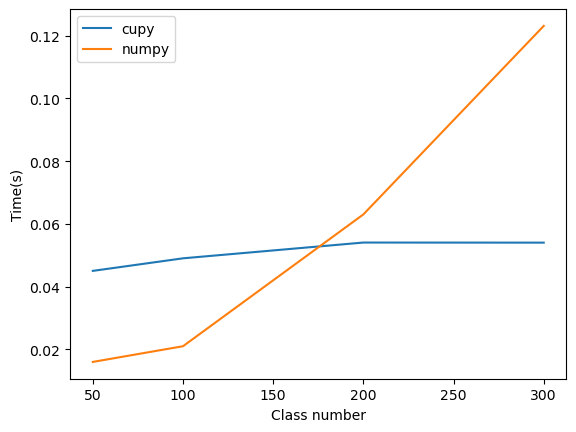

In [13]:
plt.plot(sizelist, cu_t, label='cupy')
plt.plot(sizelist, np_t, label='numpy')
plt.legend()
plt.xlabel("Class number")
plt.ylabel("Time(s)")


In [26]:
# Better to initialize states with np or cp
start = time.time()
theta = np.pi/4
phi = np.pi/7
a = np.cos(theta/2)*np.exp(1j*phi)
end = time.time()
print("numpy takes ", end-start)

start = time.time()
theta = cp.pi/1
phi = cp.pi/9
a = cp.cos(theta/2)*cp.exp(1j*phi)
end = time.time()
print("cupy takes ", end-start)

# From np to cp
start = time.time()
a = cp.asarray(a)
end = time.time()
print("Change takes ", end-start)

numpy takes  0.0010008811950683594
cupy takes  0.0
Change takes  0.0


In [34]:
a_sz = cp.zeros(10, dtype=np.cfloat)
type(a_sz)
cp.size(a_sz)

10

In [19]:
arr = cp.linspace(0,3,5)
brr = cp.linspace(2,4,5)
arr*cp.vstack(brr)

array([[ 0.   ,  1.5  ,  3.   ,  4.5  ,  6.   ],
       [ 0.   ,  1.875,  3.75 ,  5.625,  7.5  ],
       [ 0.   ,  2.25 ,  4.5  ,  6.75 ,  9.   ],
       [ 0.   ,  2.625,  5.25 ,  7.875, 10.5  ],
       [ 0.   ,  3.   ,  6.   ,  9.   , 12.   ]])

In [25]:
(cp.tile(arr, 5).reshape(5,5).T + 5)*arr*cp.vstack(brr)

array([[ 0.     ,  7.5    , 15.     , 22.5    , 30.     ],
       [ 0.     , 10.78125, 21.5625 , 32.34375, 43.125  ],
       [ 0.     , 14.625  , 29.25   , 43.875  , 58.5    ],
       [ 0.     , 19.03125, 38.0625 , 57.09375, 76.125  ],
       [ 0.     , 24.     , 48.     , 72.     , 96.     ]])

In [27]:
max(10,4,5,3,30)

30

In [30]:
0.5/1.6/np.sqrt(1e4)/1e4

3.125e-07

In [2]:
A = [0, 1/4, 3/8, 12/13, 1, 1/2]

B = np.asarray([[],
     [1/4],
     [3/32, 9/32],
     [1932/2197, -7200/2197, 7296/2197],
     [439/216, -8, 3680/513, -845/4104],
     [-8/27, 2, -3544/2565, 1859/4104, -11/40]], dtype=object)
C = [25/216, 0, 1408/2565, 2197/4104, -1/5, 0]
CH = [16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55]
CT = [1/360, 0, -128/4275, -2197/75240, 1/50, 2/55]

def RK45(fun, t0, y0, h):
    """
    Returns the new stepsize and value
    Input:
    fun: function
    y0: current value
    """
    k1 = h * fun(t0 + A[0]*h, y0)
    k2 = h * fun(t0 + A[1]*h, y0 + B[1]*k1)
    k3 = h * fun(t0 + A[2]*h, y0 + B[2][0]*k1 + B[2][1]*k2)
    k4 = h * fun(t0 + A[3]*h, y0 + B[3][0]*k1 + B[3][1]*k2 + B[3][2]*k3)
    k5 = h * fun(t0 + A[4]*h, y0 + B[4][0]*k1 + B[4][1]*k2 + B[4][2]*k3 +B[4][3]*k4)
    k6 = h * fun(t0 + A[5]*h, y0 + B[5][0]*k1 + B[5][1]*k2 + B[5][2]*k3 +B[5][3]*k4
                 + B[5][4]*k5)
    k = np.asarray([k1,k2,k3,k4,k5,k6])
    y1 = y0 + sum([CH[i]*k[i] for i in range(6)])
    TE = np.abs(sum([CT[i]*k[i] for i in range(6)])).max()
    print(TE)
    
    fac = 0.9
    min_step = 1e-6
    max_step = 1e-2
    tol = 1e-4

    h_new = min(max_step, max(min_step, h * fac * (tol/(TE+1e-6))**0.2))
    if TE > tol:
        print("Not precise enough")
        return RK45(fun, t0, y0, h_new)
    else:
        return y1, h_new

In [1]:
y0 = np.asarray([0.1,2,3,4])
def fun(t, y0):
    return y0**2 + 1
h = 1e-3
for i in range(5):
    print(y0, h)
    [y0, h_]= RK45(fun, 0, y0, h)

NameError: name 'np' is not defined